Group Members:
Connor Smith    cms6788
Abhishek Sridhar    as83788
Tom Li  hl26868

In [3]:
#1 import data/libraries
import random
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
# import torch

In [11]:
dataset = sklearn.datasets.fetch_openml("CIFAR_10_small", cache=True)

In [4]:
dataset_num = sklearn.datasets.fetch_openml('mnist_784', cache=True)

In [12]:
# reduce CIFAR size
print(dataset.data.shape, dataset.target.shape)
data = dataset.data.join(dataset.target)
data = data.sample(frac=0.5, random_state=0, replace=False)
dataset.data, dataset.target = data.iloc[:, :-1], data.iloc[:, [-1]].squeeze()
print(dataset.data.shape, dataset.target.shape)

(20000, 3072) (20000,)
(10000, 3072) (10000,)


In [ ]:
print(type(dataset_num.target))

In [5]:
# reduce MNIST size
print('before: ',dataset_num.data.shape, dataset_num.target.shape)
data_num = dataset_num.data.join(dataset_num.target)
data_num = data_num.sample(frac=0.5, random_state=0, replace=False)
dataset_num.data, dataset_num.target = data_num.iloc[:, :-1], data_num.iloc[:, [-1]].squeeze()
print('after: ', dataset_num.data.shape, dataset_num.target.shape)

before:  (70000, 784) (70000,)
after:  (35000, 784) (35000,)


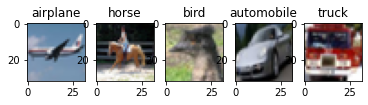

In [26]:
fig = plt.figure()
for i in range(5):
    fig.add_subplot(1, 5, i+1)
    rand = random.randrange(0,10000,1)
    classNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    classifications = dataset["target"].iloc[rand]
    im = np.uint8(np.transpose(dataset["data"].iloc[rand].to_numpy().reshape(3, 32, 32), axes=[1, 2, 0]))
    plt.imshow(im)
    plt.title(classNames[int(classifications)])

In [14]:
#create train test splits for data
train_img, test_img, train_lbl, test_lbl = train_test_split(dataset.data, dataset.target, test_size= .25, random_state=0)
train_img_num, test_img_num, train_lbl_num, test_lbl_num = train_test_split(dataset_num.data, dataset_num.target, test_size= .25, random_state=0)

In [27]:
%%time
#Train Logistic Regression Model
clf_l1 = LogisticRegression(fit_intercept=True,
                            multi_class= 'multinomial',
                            penalty= 'l2',
                            solver= 'saga',
                            max_iter= 100,
                            C=.001,
                            verbose=1, n_jobs=4
                            )

clf_l1.fit(train_img, train_lbl)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.32671294
Epoch 3, change: 0.16623850
Epoch 4, change: 0.15291279
Epoch 5, change: 0.11874959
Epoch 6, change: 0.09164642
Epoch 7, change: 0.08095785
Epoch 8, change: 0.07029986
Epoch 9, change: 0.06454135
Epoch 10, change: 0.05694027
Epoch 11, change: 0.05139672
Epoch 12, change: 0.04718630
Epoch 13, change: 0.04367321
Epoch 14, change: 0.04014699
Epoch 15, change: 0.03805809
Epoch 16, change: 0.03493958
Epoch 17, change: 0.03313849
Epoch 18, change: 0.03150472
Epoch 19, change: 0.02968605
Epoch 20, change: 0.02819296
Epoch 21, change: 0.02696805
Epoch 22, change: 0.02546941
Epoch 23, change: 0.02431766
Epoch 24, change: 0.02330152
Epoch 25, change: 0.02255569
Epoch 26, change: 0.02134452
Epoch 27, change: 0.02070704
Epoch 28, change: 0.01990694
Epoch 29, change: 0.01925419
Epoch 30, change: 0.01861840
Epoch 31, change: 0.01791764
Epoch 32, change: 0.01748502
Epoch 33, change: 0.01678554
Epoch 34, change: 0.01643839
Epoch 35, change: 0.015

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:  1.3min finished


LogisticRegression(C=0.001, multi_class='multinomial', n_jobs=4, solver='saga',
                   verbose=1)

['7']


Text(0.5, 1.0, 'Pred: horse\n')

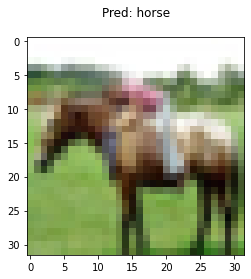

In [28]:
#Prediction test
pred0 = clf_l1.predict(np.array(test_img.iloc[0]).reshape(1,-1))

print(pred0)
fig = plt.figure()

img = test_img.iloc[0].tolist()
img = np.array(img)
img = img.reshape(3, 32, 32)
img = np.transpose(img, axes = [1, 2, 0])
img = np.uint8(img)
plt.imshow(img)
plt.title('Pred: ' + classNames[int(pred0)] + '\n')

accuracy:  0.3656
training loss:  1.2982742259924596
test loss:  1.875217122317036


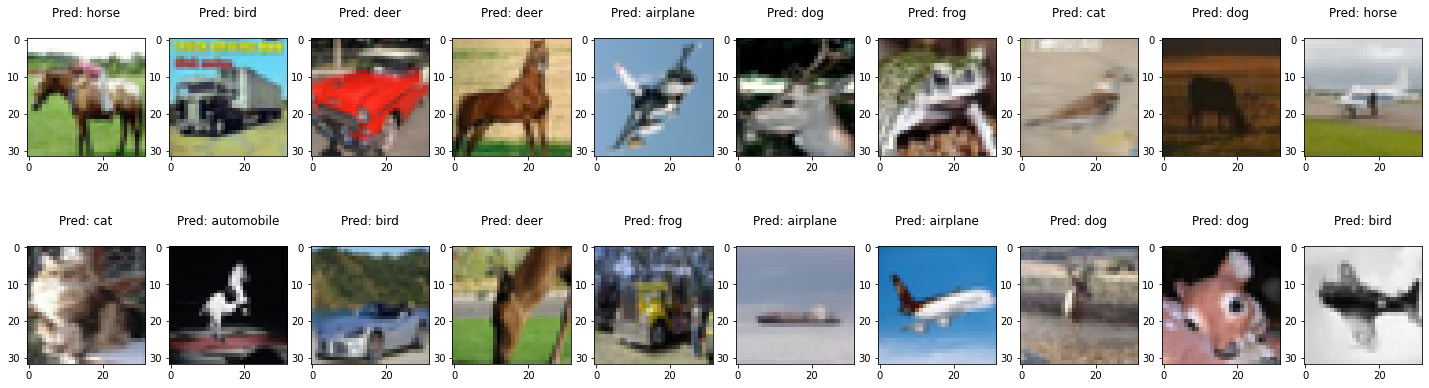

In [29]:
from sklearn.metrics import log_loss

label_pred = clf_l1.predict(test_img)
print("accuracy: ", accuracy_score(test_lbl.to_numpy(), label_pred))
print("training loss: ", log_loss(train_lbl.to_numpy(), clf_l1.predict_proba(train_img), normalize=True))
print("test loss: ", log_loss(test_lbl.to_numpy(), clf_l1.predict_proba(test_img), normalize=True))
test_fig = plt.figure(figsize=(25,7))
for i in range(20):
    test_fig.add_subplot(2, 10, i+1)
    img = np.transpose(test_img.iloc[i].to_numpy().reshape(3, 32, 32), axes = [1, 2, 0])
    img = np.uint8(img)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title('Pred: ' + classNames[int(label_pred[i])] + '\n')

test loss increased to 1.8 from 1.4 training loss as expected meaning our model is doing better on test from fitting the training set

In [30]:
clf_l1cv = LogisticRegressionCV(
    cv=5,
    fit_intercept=True,
    multi_class='multinomial',
    penalty='l1',
    solver='saga',
    max_iter=50,
    Cs=[0.001,1],
    verbose=1
)
clf_l1cv.fit(train_img, train_lbl)
cifar_pred = clf_l1cv.predict(test_img)
score = clf_l1cv.score(test_img, test_lbl)
print('score from log cv: {}'.format(score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.30247099
Epoch 3, change: 0.15612592
Epoch 4, change: 0.11623720
Epoch 5, change: 0.09545401
Epoch 6, change: 0.08576925
Epoch 7, change: 0.07352968
Epoch 8, change: 0.06703851
Epoch 9, change: 0.05999550
Epoch 10, change: 0.05621588
Epoch 11, change: 0.05235974
Epoch 12, change: 0.04878032
Epoch 13, change: 0.04350183
Epoch 14, change: 0.04147405
Epoch 15, change: 0.03894039
Epoch 16, change: 0.03639959
Epoch 17, change: 0.03453178
Epoch 18, change: 0.03289401
Epoch 19, change: 0.03112194
Epoch 20, change: 0.02948586
Epoch 21, change: 0.02792373
Epoch 22, change: 0.02659860
Epoch 23, change: 0.02537358
Epoch 24, change: 0.02424722
Epoch 25, change: 0.02324387
Epoch 26, change: 0.02231609
Epoch 27, change: 0.02159214
Epoch 28, change: 0.02082675
Epoch 29, change: 0.02018458
Epoch 30, change: 0.01949564
Epoch 31, change: 0.01884952
Epoch 32, change: 0.01826136
Epoch 33, change: 0.01773619
Epoch 34, change: 0.01699985
Epoch 35, change: 0.016

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Epoch 1, change: 1.00000000
Epoch 2, change: 0.02202578
Epoch 3, change: 0.02053226
Epoch 4, change: 0.01939188
Epoch 5, change: 0.01791318
Epoch 6, change: 0.01735578
Epoch 7, change: 0.01594521
Epoch 8, change: 0.01544002
Epoch 9, change: 0.01462148
Epoch 10, change: 0.01409662
Epoch 11, change: 0.01350787
Epoch 12, change: 0.01289895
Epoch 13, change: 0.01243285
Epoch 14, change: 0.01193808
Epoch 15, change: 0.01166240
Epoch 16, change: 0.01130522
Epoch 17, change: 0.01081802
Epoch 18, change: 0.01062389
Epoch 19, change: 0.01034196
Epoch 20, change: 0.01004384
Epoch 21, change: 0.00971330
Epoch 22, change: 0.00951257
Epoch 23, change: 0.00928030
Epoch 24, change: 0.00909485
Epoch 25, change: 0.00887709
Epoch 26, change: 0.00870258
Epoch 27, change: 0.00848132
Epoch 28, change: 0.00830370
Epoch 29, change: 0.00815766
Epoch 30, change: 0.00812200
Epoch 31, change: 0.00793574
Epoch 32, change: 0.00782241
Epoch 33, change: 0.00762882
Epoch 34, change: 0.00759899
Epoch 35, change: 0.007

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Epoch 1, change: 1.00000000
Epoch 2, change: 0.25071132
Epoch 3, change: 0.14780518
Epoch 4, change: 0.12042094
Epoch 5, change: 0.10153628
Epoch 6, change: 0.08667278
Epoch 7, change: 0.07639031
Epoch 8, change: 0.06819379
Epoch 9, change: 0.06252214
Epoch 10, change: 0.05651635
Epoch 11, change: 0.05216272
Epoch 12, change: 0.04744105
Epoch 13, change: 0.04458606
Epoch 14, change: 0.04172965
Epoch 15, change: 0.03940092
Epoch 16, change: 0.03715007
Epoch 17, change: 0.03487713
Epoch 18, change: 0.03325111
Epoch 19, change: 0.03190538
Epoch 20, change: 0.03030579
Epoch 21, change: 0.02863405
Epoch 22, change: 0.02797592
Epoch 23, change: 0.02666162
Epoch 24, change: 0.02568527
Epoch 25, change: 0.02485864
Epoch 26, change: 0.02393258
Epoch 27, change: 0.02330391
Epoch 28, change: 0.02250252
Epoch 29, change: 0.02167023
Epoch 30, change: 0.02092967
Epoch 31, change: 0.02044864
Epoch 32, change: 0.01974456
Epoch 33, change: 0.01921819
Epoch 34, change: 0.01854864
Epoch 35, change: 0.018

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Epoch 1, change: 1.00000000
Epoch 2, change: 0.02405745
Epoch 3, change: 0.02333125
Epoch 4, change: 0.02111274
Epoch 5, change: 0.02031244
Epoch 6, change: 0.01908170
Epoch 7, change: 0.01789531
Epoch 8, change: 0.01730724
Epoch 9, change: 0.01653323
Epoch 10, change: 0.01590862
Epoch 11, change: 0.01538887
Epoch 12, change: 0.01463017
Epoch 13, change: 0.01435223
Epoch 14, change: 0.01396896
Epoch 15, change: 0.01325622
Epoch 16, change: 0.01300548
Epoch 17, change: 0.01272704
Epoch 18, change: 0.01229558
Epoch 19, change: 0.01187479
Epoch 20, change: 0.01160638
Epoch 21, change: 0.01131322
Epoch 22, change: 0.01111372
Epoch 23, change: 0.01081386
Epoch 24, change: 0.01053618
Epoch 25, change: 0.01031443
Epoch 26, change: 0.01008689
Epoch 27, change: 0.00982038
Epoch 28, change: 0.00958739
Epoch 29, change: 0.00937253
Epoch 30, change: 0.00919343
Epoch 31, change: 0.00898315
Epoch 32, change: 0.00879202
Epoch 33, change: 0.00865791
Epoch 34, change: 0.00847976
Epoch 35, change: 0.008

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Epoch 1, change: 1.00000000
Epoch 2, change: 0.25075919
Epoch 3, change: 0.16067090
Epoch 4, change: 0.12606463
Epoch 5, change: 0.09666869
Epoch 6, change: 0.08575741
Epoch 7, change: 0.07451744
Epoch 8, change: 0.06582365
Epoch 9, change: 0.05879058
Epoch 10, change: 0.05207591
Epoch 11, change: 0.04889797
Epoch 12, change: 0.04527587
Epoch 13, change: 0.04218316
Epoch 14, change: 0.03963653
Epoch 15, change: 0.03732133
Epoch 16, change: 0.03559326
Epoch 17, change: 0.03338541
Epoch 18, change: 0.03174640
Epoch 19, change: 0.03002503
Epoch 20, change: 0.02860156
Epoch 21, change: 0.02754572
Epoch 22, change: 0.02656375
Epoch 23, change: 0.02554274
Epoch 24, change: 0.02425650
Epoch 25, change: 0.02309525
Epoch 26, change: 0.02224215
Epoch 27, change: 0.02144109
Epoch 28, change: 0.02058553
Epoch 29, change: 0.01969336
Epoch 30, change: 0.01906281
Epoch 31, change: 0.01849721
Epoch 32, change: 0.01777302
Epoch 33, change: 0.01720138
Epoch 34, change: 0.01675962
Epoch 35, change: 0.016

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Epoch 1, change: 1.00000000
Epoch 2, change: 0.02357867
Epoch 3, change: 0.02174784
Epoch 4, change: 0.02056447
Epoch 5, change: 0.01940243
Epoch 6, change: 0.01851822
Epoch 7, change: 0.01760180
Epoch 8, change: 0.01669123
Epoch 9, change: 0.01649406
Epoch 10, change: 0.01562893
Epoch 11, change: 0.01514386
Epoch 12, change: 0.01457787
Epoch 13, change: 0.01407414
Epoch 14, change: 0.01380394
Epoch 15, change: 0.01366119
Epoch 16, change: 0.01310232
Epoch 17, change: 0.01276804
Epoch 18, change: 0.01244736
Epoch 19, change: 0.01208403
Epoch 20, change: 0.01183619
Epoch 21, change: 0.01173740
Epoch 22, change: 0.01142924
Epoch 23, change: 0.01120849
Epoch 24, change: 0.01085630
Epoch 25, change: 0.01068896
Epoch 26, change: 0.01054381
Epoch 27, change: 0.01027458
Epoch 28, change: 0.01017079
Epoch 29, change: 0.00995500
Epoch 30, change: 0.00980007
Epoch 31, change: 0.00961456
Epoch 32, change: 0.00952613
Epoch 33, change: 0.00934454
Epoch 34, change: 0.00918648
Epoch 35, change: 0.009

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Epoch 1, change: 1.00000000
Epoch 2, change: 0.30212224
Epoch 3, change: 0.18466454
Epoch 4, change: 0.12924627
Epoch 5, change: 0.10184177
Epoch 6, change: 0.08528019
Epoch 7, change: 0.07433532
Epoch 8, change: 0.06779535
Epoch 9, change: 0.06141045
Epoch 10, change: 0.05552186
Epoch 11, change: 0.05072224
Epoch 12, change: 0.04721327
Epoch 13, change: 0.04361926
Epoch 14, change: 0.04117762
Epoch 15, change: 0.03840543
Epoch 16, change: 0.03612555
Epoch 17, change: 0.03412251
Epoch 18, change: 0.03224516
Epoch 19, change: 0.03065106
Epoch 20, change: 0.02907460
Epoch 21, change: 0.02770368
Epoch 22, change: 0.02633139
Epoch 23, change: 0.02535425
Epoch 24, change: 0.02427929
Epoch 25, change: 0.02311545
Epoch 26, change: 0.02206548
Epoch 27, change: 0.02142778
Epoch 28, change: 0.02048372
Epoch 29, change: 0.01982580
Epoch 30, change: 0.01901393
Epoch 31, change: 0.01827280
Epoch 32, change: 0.01772237
Epoch 33, change: 0.01698984
Epoch 34, change: 0.01643774
Epoch 35, change: 0.015

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Epoch 1, change: 1.00000000
Epoch 2, change: 0.02182879
Epoch 3, change: 0.02075230
Epoch 4, change: 0.01877910
Epoch 5, change: 0.01791515
Epoch 6, change: 0.01662826
Epoch 7, change: 0.01588131
Epoch 8, change: 0.01524642
Epoch 9, change: 0.01484876
Epoch 10, change: 0.01438297
Epoch 11, change: 0.01377647
Epoch 12, change: 0.01312795
Epoch 13, change: 0.01287136
Epoch 14, change: 0.01239956
Epoch 15, change: 0.01204407
Epoch 16, change: 0.01187657
Epoch 17, change: 0.01146134
Epoch 18, change: 0.01111825
Epoch 19, change: 0.01082531
Epoch 20, change: 0.01061326
Epoch 21, change: 0.01035937
Epoch 22, change: 0.01002451
Epoch 23, change: 0.00983666
Epoch 24, change: 0.00959424
Epoch 25, change: 0.00944280
Epoch 26, change: 0.00918659
Epoch 27, change: 0.00901040
Epoch 28, change: 0.00886178
Epoch 29, change: 0.00870168
Epoch 30, change: 0.00845704
Epoch 31, change: 0.00825292
Epoch 32, change: 0.00822410
Epoch 33, change: 0.00805372
Epoch 34, change: 0.00790969
Epoch 35, change: 0.007

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Epoch 1, change: 1.00000000
Epoch 2, change: 0.27325539
Epoch 3, change: 0.16382063
Epoch 4, change: 0.11020753
Epoch 5, change: 0.10514343
Epoch 6, change: 0.08994700
Epoch 7, change: 0.07924341
Epoch 8, change: 0.07141656
Epoch 9, change: 0.06686981
Epoch 10, change: 0.06170163
Epoch 11, change: 0.05743224
Epoch 12, change: 0.05312570
Epoch 13, change: 0.04862381
Epoch 14, change: 0.04552447
Epoch 15, change: 0.04260601
Epoch 16, change: 0.03981114
Epoch 17, change: 0.03773883
Epoch 18, change: 0.03601146
Epoch 19, change: 0.03392721
Epoch 20, change: 0.03204628
Epoch 21, change: 0.03029247
Epoch 22, change: 0.02904952
Epoch 23, change: 0.02767225
Epoch 24, change: 0.02641756
Epoch 25, change: 0.02534062
Epoch 26, change: 0.02437481
Epoch 27, change: 0.02331912
Epoch 28, change: 0.02242921
Epoch 29, change: 0.02158799
Epoch 30, change: 0.02084376
Epoch 31, change: 0.02000973
Epoch 32, change: 0.01943051
Epoch 33, change: 0.01864216
Epoch 34, change: 0.01804888
Epoch 35, change: 0.017

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Epoch 1, change: 1.00000000
Epoch 2, change: 0.02299916
Epoch 3, change: 0.02212013
Epoch 4, change: 0.02077896
Epoch 5, change: 0.01947365
Epoch 6, change: 0.01859857
Epoch 7, change: 0.01740468
Epoch 8, change: 0.01651944
Epoch 9, change: 0.01601619
Epoch 10, change: 0.01548607
Epoch 11, change: 0.01476766
Epoch 12, change: 0.01425361
Epoch 13, change: 0.01354939
Epoch 14, change: 0.01320503
Epoch 15, change: 0.01285540
Epoch 16, change: 0.01240202
Epoch 17, change: 0.01197832
Epoch 18, change: 0.01174475
Epoch 19, change: 0.01125208
Epoch 20, change: 0.01096592
Epoch 21, change: 0.01076687
Epoch 22, change: 0.01044067
Epoch 23, change: 0.01017851
Epoch 24, change: 0.00988087
Epoch 25, change: 0.00967125
Epoch 26, change: 0.00939603
Epoch 27, change: 0.00921757
Epoch 28, change: 0.00901723
Epoch 29, change: 0.00889698
Epoch 30, change: 0.00856867
Epoch 31, change: 0.00842829
Epoch 32, change: 0.00824058
Epoch 33, change: 0.00803454
Epoch 34, change: 0.00784323
Epoch 35, change: 0.007

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 15.3min finished


score from log cv: 0.394


/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [31]:
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}       
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 144, 188, 233, 277, 322, 366, 411, 455, 500]}


In [32]:
#Random Forest for CIFAR with CV
rfc = RandomForestClassifier(n_estimators=100)
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(train_img,train_lbl)

#Random Forest CIFAR
rfc.fit(train_img, train_lbl)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=277; total time=  16.9s
[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=277; total time=  17.2s
[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=277; total time=  17.4s


RandomForestClassifier()

In [33]:
rf_random.best_params_

{'n_estimators': 277,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 36,
 'bootstrap': False}

In [35]:
#Random Forest CV CIFAR Predictions
cv_pred = rf_random.predict(test_img)
print("CV prediction: ")
# for i in range(len(test_lbl.to_numpy())):
    # print("Prediction:", cv_pred[i], "Actual:", test_lbl.to_numpy()[i])
print("CV train accuracy: ", rf_random.score(train_img, train_lbl))
print("CV test accuracy: ", rf_random.score(test_img, test_lbl))
print("CV train loss: ", log_loss(train_lbl.to_numpy(), rf_random.predict_proba(train_img), normalize=True))
print("CV test loss: ", log_loss(test_lbl.to_numpy(), rf_random.predict_proba(test_img), normalize=True))

#Random Forest CIFAR Predictions
print("Random Forest CIFAR Prediction:")
print("train accuracy: ", rfc.score(train_img, train_lbl))
print("test accuracy: ", rfc.score(test_img, test_lbl))
print("train loss: ", log_loss(train_lbl.to_numpy(), rfc.predict_proba(train_img), normalize=True))
print("test loss: ", log_loss(test_lbl.to_numpy(), rfc.predict_proba(test_img), normalize=True))

CV prediction: 
CV train accuracy:  1.0
CV test accuracy:  0.4352
CV train loss:  0.4531789746848688
CV test loss:  1.737289484521643
Random Forest CIFAR Prediction:
train accuracy:  1.0
test accuracy:  0.414
train loss:  0.3453414174584723
test loss:  1.7938040124813117


cv test accuracy (0.435) improved from non-cv random forest test accuracy (0.414) which is expected since hyperparameter is tuned

In [36]:
%%time
#Random Forest for MNIST
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_img_num,train_lbl_num)


#CV Random Forest MNIST (hyperparameter tuning)
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(train_img_num,train_lbl_num)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=277; total time=  14.3s
[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=277; total time=  14.4s
[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=277; total time=  14.5s
CPU times: user 33.8 s, sys: 209 ms, total: 34 s
Wall time: 49.4 s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=1,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50, None],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   random_state=42, verbose=2)

In [38]:
#CV Random Forest MNIST Prediction
print("MNIST Predictions:")
print("CV train accuracy: ", rf_random.score(train_img_num, train_lbl_num))
print("CV test accuracy: ", rf_random.score(test_img_num, test_lbl_num))
print("CV train loss: ", log_loss(train_lbl_num.to_numpy(), rf_random.predict_proba(train_img_num), normalize=True))
print("CV test loss: ", log_loss(test_lbl_num.to_numpy(), rf_random.predict_proba(test_img_num), normalize=True))

#Random Forest MNIST Predictions
print()
print("train accuracy: ", rfc.score(train_img_num, train_lbl_num))
print("test accuracy: ", rfc.score(test_img_num, test_lbl_num))
print("train loss: ", log_loss(train_lbl_num.to_numpy(), rfc.predict_proba(train_img_num), normalize=True))
print("test loss: ", log_loss(test_lbl_num.to_numpy(), rfc.predict_proba(test_img_num), normalize=True))

MNIST Predictions:
CV train accuracy:  0.9999238095238095
CV test accuracy:  0.9589714285714286
CV train loss:  0.1520211715664609
CV test loss:  0.3792766237262439

train accuracy:  1.0
test accuracy:  0.9592
train loss:  0.0890278324074414
test loss:  0.31695277024898566


cv did not improved random forest MNIST prediction accuracy: 0.959 to 0.958 

In [9]:
from scipy import stats
clf_xgb = xgb.XGBClassifier(verbosity=1)
param_dist = {
    'n_estimators': stats.randint(150, 1000),
    'learning_rate': stats.uniform(0.1, 0.3),
    'subsample': stats.uniform(0.3, 0.6),
    'max_depth': [6, 7, 8],
    'colsample_bytree': stats.uniform(0.5, 0.4),
    'min_child_weight': [4, 5]
}

# numFolds = 5
# kfold_5 = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 5,  
                         n_iter = 1,  
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)
                         
clf.fit(train_img_num, train_lbl_num)

#Gradient Boosting on MNIST
gbc = XGBClassifier(verbosity=1)
gbc.fit(train_img_num, train_lbl_num)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/tom/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/tom/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/tom/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The u

[23:04:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.8729467994589013, learning_rate=0.28682642622182747, max_depth=7, min_child_weight=5, n_estimators=253, subsample=0.5528921124708609;, score=0.000 total time=41.0min


/home/tom/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached

[CV 2/5] END colsample_bytree=0.8729467994589013, learning_rate=0.28682642622182747, max_depth=7, min_child_weight=5, n_estimators=253, subsample=0.5528921124708609;, score=0.000 total time=41.1min


/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.8729467994589013, learning_rate=0.28682642622182747, max_depth=7, min_child_weight=5, n_estimators=253, subsample=0.5528921124708609;, score=0.000 total time=41.2min
[23:45:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.8729467994589013, learning_rate=0.28682642622182747, max_depth=7, min_child_weight=5, n_estimators=253, subsample=0.5528921124708609;, score=0.000 total time=41.3min


/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 5/5] END colsample_bytree=0.8729467994589013, learning_rate=0.28682642622182747, max_depth=7, min_child_weight=5, n_estimators=253, subsample=0.5528921124708609;, score=0.000 total time= 4.4min


/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/home/tom/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To rem

[23:49:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [39]:
#Gradient Boosting MNIST Predictions
cv_pred = clf.predict(test_img_num)
pred = gbc.predict(test_img_num)
print('cv test accuracy: ', accuracy_score(test_lbl_num, cv_pred))
print('non-cv test accuracy: ', accuracy_score(test_lbl_num, pred))

cv test accuracy:  0.9664
non-cv test accuracy:  0.9675428571428571


In [13]:
clf.best_params_

{'colsample_bytree': 0.8729467994589013,
 'learning_rate': 0.28682642622182747,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 253,
 'subsample': 0.5528921124708609}

cv did not improve test accuracy compared to out-of-box XGBClassifier, but cv best params was found which is likely similar to what the model itself used. 

In [16]:
clf_xgb_cifar = xgb.XGBClassifier(verbosity=1)
param_dist = {
    'n_estimators': stats.randint(150, 1000),
    'learning_rate': stats.uniform(0.1, 0.3),
    'subsample': stats.uniform(0.3, 0.6),
    'max_depth': [6, 7, 8],
    'colsample_bytree': stats.uniform(0.5, 0.4),
    'min_child_weight': [4, 5]
}

# numFolds = 5
# kfold_5 = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

clf_cifar = RandomizedSearchCV(clf_xgb_cifar, 
                         param_distributions = param_dist,
                         cv = 5,  
                         n_iter = 1, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)
                         
clf_cifar.fit(train_img, train_lbl)

#Gradient Boosting on CIFAR
gbc_cifar = XGBClassifier(verbosity=1)
gbc_cifar.fit(train_img, train_lbl)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/tom/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/tom/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/tom/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The u

[10:43:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.756731368962299, learning_rate=0.2058809814322859, max_depth=7, min_child_weight=4, n_estimators=601, subsample=0.5525302769170537;, score=0.000 total time=104.7min


/home/tom/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached

[CV 1/5] END colsample_bytree=0.756731368962299, learning_rate=0.2058809814322859, max_depth=7, min_child_weight=4, n_estimators=601, subsample=0.5525302769170537;, score=0.000 total time=104.8min


/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.756731368962299, learning_rate=0.2058809814322859, max_depth=7, min_child_weight=4, n_estimators=601, subsample=0.5525302769170537;, score=0.000 total time=104.9min


/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.756731368962299, learning_rate=0.2058809814322859, max_depth=7, min_child_weight=4, n_estimators=601, subsample=0.5525302769170537;, score=0.000 total time=104.9min
[12:28:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.756731368962299, learning_rate=0.2058809814322859, max_depth=7, min_child_weight=4, n_estimators=601, subsample=0.5525302769170537;, score=0.000 total time=12.4min


/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/home/tom/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/home/tom/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To rem

[12:40:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:56:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [25]:
from sklearn.metrics import log_loss
#Gradient Boosting CIFAR Predictions
cv_pred = clf_cifar.predict(test_img)
cv_pred_proba = clf_cifar.predict_proba(test_img)
pred = gbc_cifar.predict(test_img)
pred_proba = gbc_cifar.predict_proba(test_img)
print('cv accuracy score: ', accuracy_score(test_lbl, cv_pred))
print('accuracy score: ', accuracy_score(test_lbl, pred))

# print(pred)

# Loss Stats
print('cv log loss: ', log_loss(test_lbl, cv_pred_proba, normalize=False))
print('log loss: ', log_loss(test_lbl, pred_proba, normalize=False))

cv accuracy score:  0.4768
accuracy score:  0.4716
cv log loss:  4056.2402420630533
log loss:  4044.918773193378


In [40]:
clf_cifar.best_params_

{'colsample_bytree': 0.756731368962299,
 'learning_rate': 0.2058809814322859,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 601,
 'subsample': 0.5525302769170537}

cv improve accuracy about 0.005 (0.5%). Best params are shown above.